# Logistic Regression with Gradient Ascent from Scratch (Handwritten Digits Classification)



## Gradient Ascent algorithm
The equation below is used to update the logistic regression model parameters:    

\begin{equation}
\theta^{+} = \theta^{-} + \alpha (y_{i} - h(x_{i}) )\bar{x}
\end{equation}

This maximizes the following log likelihood function

\begin{equation}
J(x, \theta, y) = \sum_{i=1}^{m}y_i\log(h(x_{i})) + (1 - y_i)\log(1 - h(x_{i}))
\end{equation}

where our hypothesis is a sigmoid function
\begin{equation}
h(x_i) = \frac{1}{1 + e^{\theta^T \bar{x}}}
\end{equation}

### Batch gradient Ascent
```FOR j FROM 0 -> max_iteration: 
    FOR i FROM 0 -> m: 
        theta += (alpha) * (y[i] - h(x[i])) * x_bar
    ENDLOOP
ENDLOOP
```

## Multi-class Classification with one-vs-all (one-vs-rest)
If you have n-classes, we train n-classifiers and given a new data point we predict using all the classifiers and choose the one with the highest probability

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [14]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 640x480 with 0 Axes>

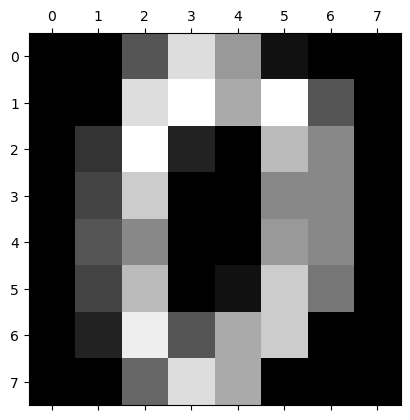

In [24]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

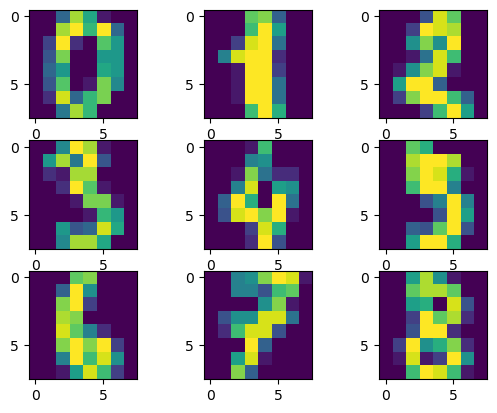

In [2]:
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(digits.images[0])
axarr[0,1].imshow(digits.images[1])
axarr[0,2].imshow(digits.images[2])
axarr[1,0].imshow(digits.images[3])
axarr[1,1].imshow(digits.images[4])
axarr[1,2].imshow(digits.images[5])
axarr[2,0].imshow(digits.images[6])
axarr[2,1].imshow(digits.images[7])
axarr[2,2].imshow(digits.images[8])
plt.show()

## Logistic Regression Class

In [3]:
# Class for training and using a model for logistic regression
class LogisticRegression():
    
    # Set the values for initial params, step size, maximum iteration, and class of interest
    def set_values(self, initial_params, alpha=0.01, max_iter=5000, class_of_interest=0):    
        self.params = initial_params
        self.alpha = alpha
        self.max_iter = max_iter
        self.class_of_interest = class_of_interest
    
    @staticmethod
    # Sigmoide function
    def _sigmoid(x): 
        return 1.0 / (1.0 + np.exp(-x))
    
    # predict the probability of a class
    def predict(self, x_bar, params):      
        return self._sigmoid(np.dot(params, x_bar))
    
    # Compute the log likelihood cost
    def _compute_cost(self, input_var, output_var, params):
        cost = 0
        for x, y in zip(input_var, output_var):
            x_bar = np.array(np.insert(x, 0, 1))
            y_hat = self.predict(x_bar, params)
            
            y_binary = 1.0 if y == self.class_of_interest else 0.0
            cost += y_binary * np.log(y_hat) + (1.0 - y_binary) * np.log(1 - y_hat)
            
        return cost
    
    # Train the model using batch gradient ascent
    def train(self, input_var, label, print_iter = 5000):
        iteration = 1
        while iteration < self.max_iter:
            if iteration % print_iter == 0:
                print(f'iteration: {iteration}')
                print(f'cost: {self._compute_cost(input_var, label, self.params)}')
                print('--------------------------------------------')
            
            for i, xy in enumerate(zip(input_var, label)):
                x_bar = np.array(np.insert(xy[0], 0, 1))
                y_hat = self.predict(x_bar, self.params)
                
                y_binary = 1.0 if xy[1] == self.class_of_interest else 0.0
                gradient = (y_binary - y_hat) * x_bar
                self.params += self.alpha * gradient
            
            iteration +=1
        
        return self.params

    # Test the accuracy of the model using test data
    def test(self, input_test, label_test):
        self.total_classifications = 0
        self.correct_classifications = 0
        
        for x,y in zip(input_test, label_test):
            self.total_classifications += 1
            x_bar = np.array(np.insert(x, 0, 1))
            y_hat = self.predict(x_bar, self.params)
            y_binary = 1.0 if y == self.class_of_interest else 0.0
            
            if y_hat >= 0.5 and  y_binary == 1:
                # correct classification of class_of_interest
                self.correct_classifications += 1
              
            if y_hat < 0.5 and  y_binary != 1:
                # correct classification of another class
                self.correct_classifications += 1
                
        self.accuracy = self.correct_classifications / self.total_classifications
            
        return self.accuracy

## Model for predicting if an image is a zero (0)

### Step 1: Split the dataset into a training and test set

In [4]:
digits_train, digits_test, digits_label_train, digits_label_test =\
train_test_split(digits.data, digits.target, test_size=0.20)

### Step 2: Set the hyperparameters

In [ ]:
# Learning rate
alpha = 1e-2

# Theta
params_0 = np.zeros(len(digits.data[0]) + 1)

# Number of iterations
max_iter = 10000

### Step 3: Train the Logistic Regression Model

In [5]:
digits_regression_model_0 = LogisticRegression()
digits_regression_model_0.set_values(params_0, alpha, max_iter, 0)

params =\
digits_regression_model_0.train(digits_train / 16.0, digits_label_train, 1000)


iteration: 1000
cost: -1.49145224608174
--------------------------------------------
iteration: 2000
cost: -0.8306701286602193
--------------------------------------------
iteration: 3000
cost: -0.5829094773642394
--------------------------------------------
iteration: 4000
cost: -0.45136140932856605
--------------------------------------------
iteration: 5000
cost: -0.36929908560652647
--------------------------------------------
iteration: 6000
cost: -0.31302859835133723
--------------------------------------------
iteration: 7000
cost: -0.2719533484260614
--------------------------------------------
iteration: 8000
cost: -0.24060433714305232
--------------------------------------------
iteration: 9000
cost: -0.2158663460471675
--------------------------------------------


### Step 4: Test the Logistic Regression Model

In [6]:
# accuracy
digits_accuracy = digits_regression_model_0.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a ZERO digit in test set: {digits_accuracy}')

Accuracy of prediciting a ZERO digit in test set: 0.9916666666666667


## Model for predicting if an image is a (1)

### Step 1: Set the hyperparameters

In [ ]:
# Learning rate
alpha = 1e-2

# Theta
params_0 = np.zeros(len(digits.data[0]) + 1)

# Number of iterations
max_iter = 10000

### Step 2: Train the Logistic Regression Model

In [7]:
digits_regression_model_1 = LogisticRegression()
digits_regression_model_1.set_values(params_0, alpha, max_iter, 1)

params =\
digits_regression_model_1.train(digits_train / 16.0, digits_label_train, 1000)

iteration: 1000
cost: -33.899425388208286
--------------------------------------------
iteration: 2000
cost: -27.051531210088005
--------------------------------------------
iteration: 3000
cost: -23.747483219022566
--------------------------------------------
iteration: 4000
cost: -21.647031223330064
--------------------------------------------
iteration: 5000
cost: -20.13600080031068
--------------------------------------------
iteration: 6000
cost: -18.970894970577895
--------------------------------------------
iteration: 7000
cost: -18.03172279485272
--------------------------------------------
iteration: 8000
cost: -17.25080520642663
--------------------------------------------
iteration: 9000
cost: -16.586316965268548
--------------------------------------------


### Step 3: Test the Logistic Regression Model

In [8]:
#accuracy
digits_accuracy = digits_regression_model_1.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a ONE digit in test set: {digits_accuracy}')

Accuracy of prediciting a ONE digit in test set: 0.9861111111111112


## Model for predicting if an image is a two (2)

### Step 1: Set the hyperparameters

In [ ]:
# Learning rate
alpha = 1e-2

# Theta
params_0 = np.zeros(len(digits.data[0]) + 1)

# Number of iterations
max_iter = 10000

### Step 2: Train the Logistic Regression Model

In [9]:
digits_regression_model_2 = LogisticRegression()
digits_regression_model_2.set_values(params_0, alpha, max_iter, 2)

params =\
digits_regression_model_2.train(digits_train / 16.0, digits_label_train, 1000)

iteration: 1000
cost: -3.085419221462016
--------------------------------------------
iteration: 2000
cost: -1.703505149511124
--------------------------------------------
iteration: 3000
cost: -1.190238406945516
--------------------------------------------
iteration: 4000
cost: -0.9190884497602545
--------------------------------------------
iteration: 5000
cost: -0.7505134039613631
--------------------------------------------
iteration: 6000
cost: -0.6352137955374438
--------------------------------------------
iteration: 7000
cost: -0.5512180677378223
--------------------------------------------
iteration: 8000
cost: -0.4872166742966965
--------------------------------------------
iteration: 9000
cost: -0.43678144687809706
--------------------------------------------


### Step 3: Test the Logistic Regression Model

In [10]:
digits_accuracy = digits_regression_model_2.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a TWO digit in test set: {digits_accuracy}')

Accuracy of prediciting a TWO digit in test set: 1.0


## Model for predicting if an image is a eight (8)

### Step 1: Set the hyperparameters

In [ ]:
# Learning rate
alpha = 1e-2

# Theta
params_0 = np.zeros(len(digits.data[0]) + 1)

# Number of iterations
max_iter = 10000

### Step 2: Train the Logistic Regression Model

In [11]:
digits_regression_model_8 = LogisticRegression()
digits_regression_model_8.set_values(params_0, alpha, max_iter, 8)

params =\
digits_regression_model_8.train(digits_train / 16.0, digits_label_train, 1000)

iteration: 1000
cost: -104.5642194253311
--------------------------------------------
iteration: 2000
cost: -102.41902277133254
--------------------------------------------
iteration: 3000
cost: -101.64224233075014
--------------------------------------------
iteration: 4000
cost: -101.21655586090762
--------------------------------------------
iteration: 5000
cost: -100.92368082132481
--------------------------------------------
iteration: 6000
cost: -100.69258506470024
--------------------------------------------
iteration: 7000
cost: -100.49542320873294
--------------------------------------------
iteration: 8000
cost: -100.31976770920348
--------------------------------------------
iteration: 9000
cost: -100.15937960875796
--------------------------------------------


### Step 3: Test the Logistic Regression Model

In [12]:
digits_accuracy = digits_regression_model_8.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a EIGHT digit in test set: {digits_accuracy}')

Accuracy of prediciting a EIGHT digit in test set: 0.9638888888888889
